In [3]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
dog = cv2.imread('img/dog.jpg')

In [4]:
def imshow(raw_pic):
    modified = cv2.cvtColor(raw_pic,cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12,14))
    return plt.imshow(modified)

In [17]:
imshow(dog)

In [24]:
gray_dog = cv2.cvtColor(dog,cv2.COLOR_BGR2GRAY)

retval, dst = cv2.threshold(gray_dog,200,255,cv2.THRESH_BINARY)
imshow(dst)

In [25]:
retval

200.0

THRESHOLD NORMAL (GLOBAL)

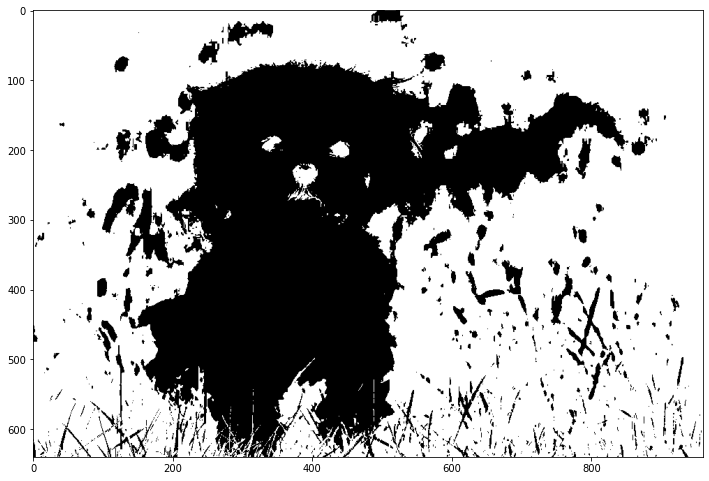

In [27]:
retval, dst = cv2.threshold(gray_dog,127,255,cv2.THRESH_BINARY_INV)
imshow(dst)

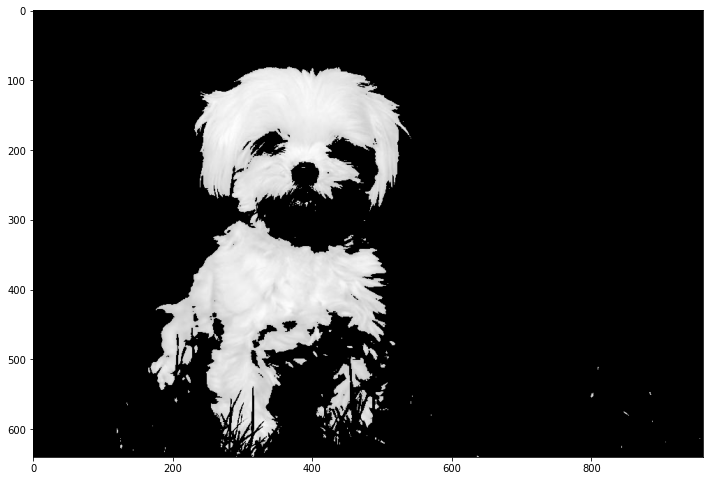

In [29]:
retval, dst = cv2.threshold(gray_dog,200,255,cv2.THRESH_TOZERO)
imshow(dst)

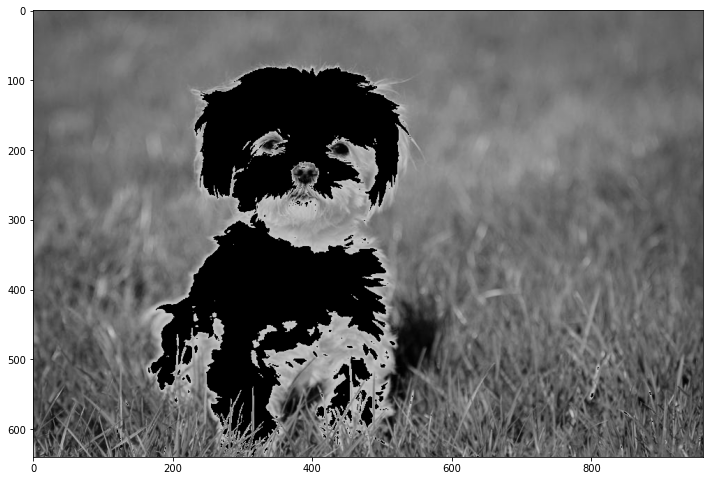

In [30]:
retval, dst = cv2.threshold(gray_dog,200,255,cv2.THRESH_TOZERO_INV)
imshow(dst)

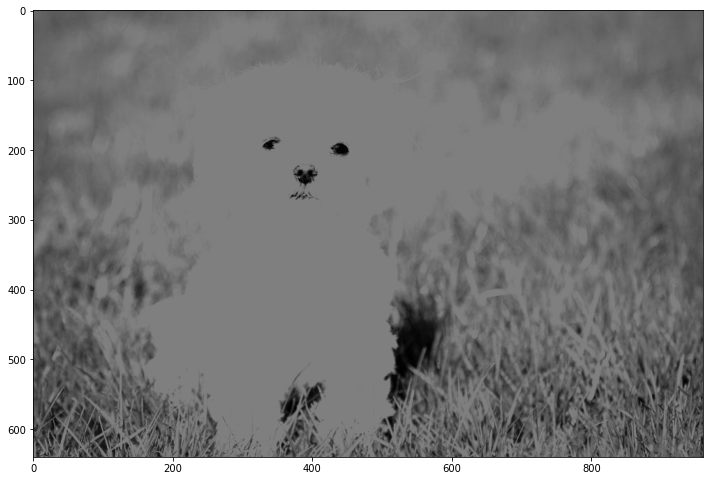

In [32]:
retval, dst = cv2.threshold(gray_dog,127,255,cv2.THRESH_TRUNC)
imshow(dst)

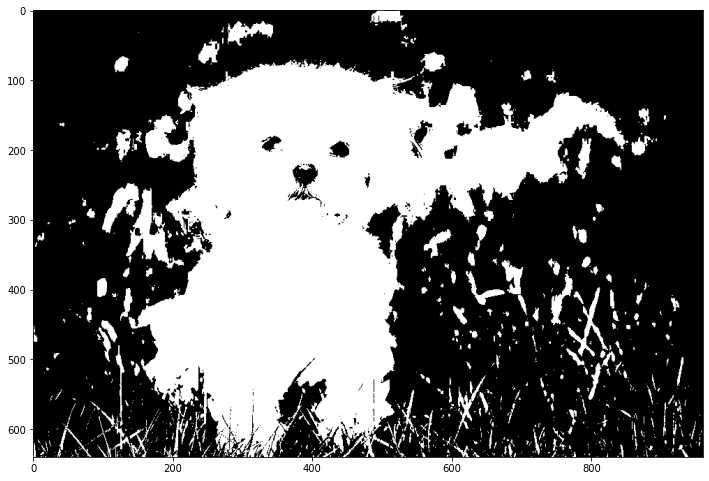

In [35]:
retval, dst = cv2.threshold(gray_dog,127,255,cv2.THRESH_BINARY)
imshow(dst)

In [48]:
retval, dst = cv2.threshold(gray_dog,200,255,cv2.THRESH_BINARY)


In [49]:
cv2.imshow('max',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [46]:
dst.max()

50

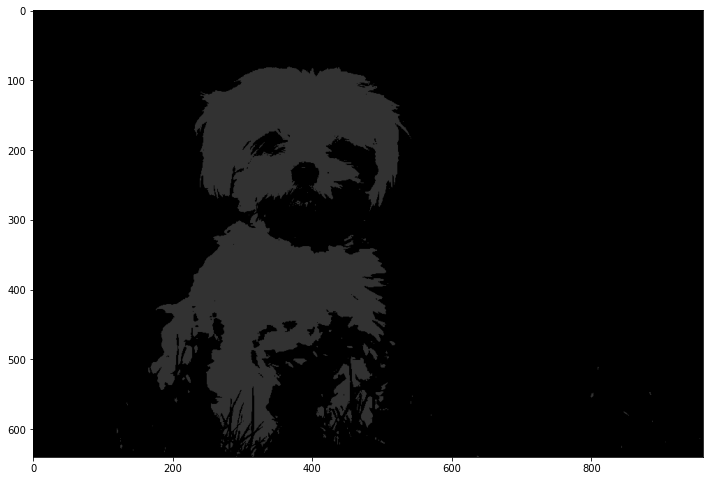

In [47]:
imshow(dst)

In [41]:
cv2.imshow('max',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [56]:
leaf = cv2.imread('img/noisy_leaf.jpg')
gray_leaf = cv2.cvtColor(leaf,cv2.COLOR_BGR2GRAY)

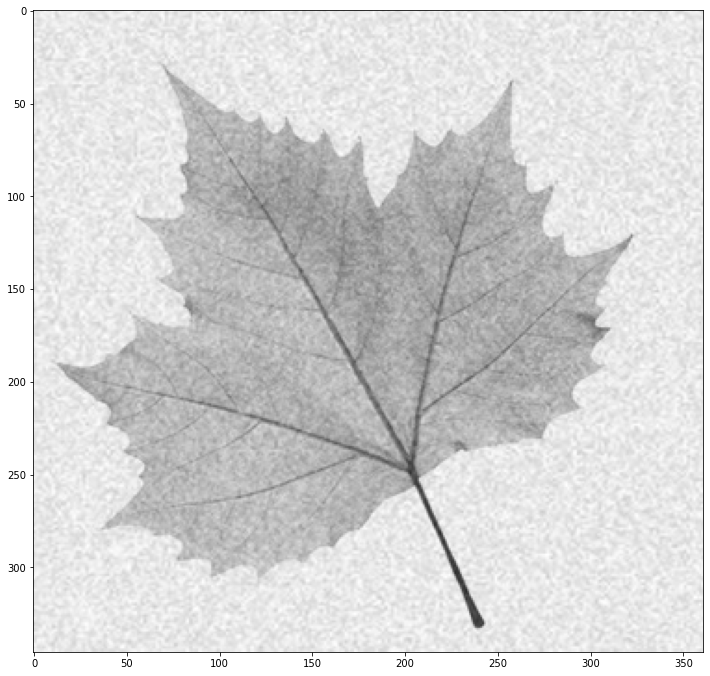

In [57]:
imshow(gray_leaf)

In [58]:
ret, otsu = cv2.threshold(gray_leaf,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [61]:
ret

202.0

In [62]:
imshow(otsu)

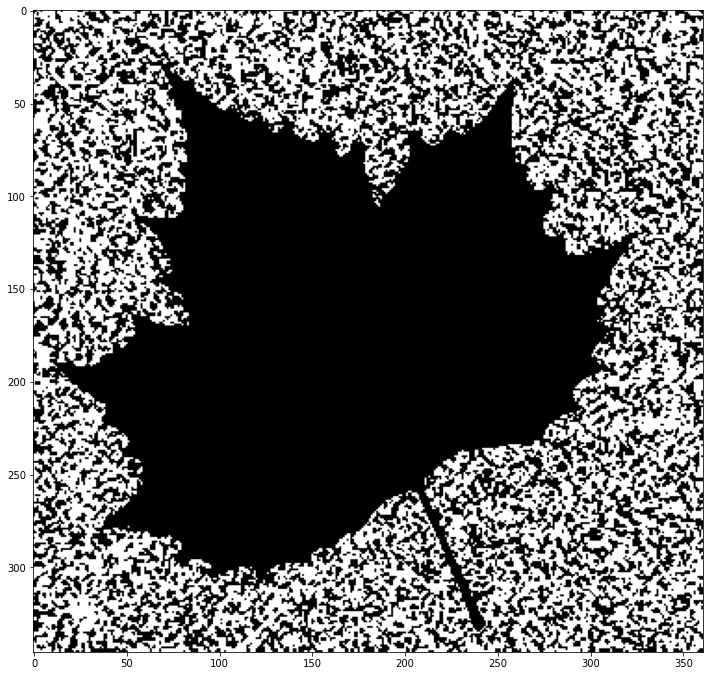

In [70]:
ret, otsu = cv2.threshold(gray_leaf,230,255,cv2.THRESH_BINARY)
imshow(otsu)

(1048, 1848)


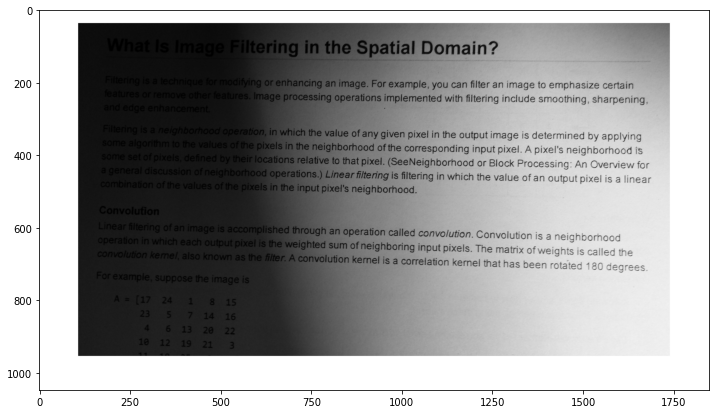

In [76]:
text_img = cv2.imread('img/notes.png')

text_img_gray = cv2.imread('img/notes.png',cv2.IMREAD_GRAYSCALE) # cv2.IMREAD_GRAYSCALE = 0 
imshow(text_img_gray)
print(text_img_gray.shape)

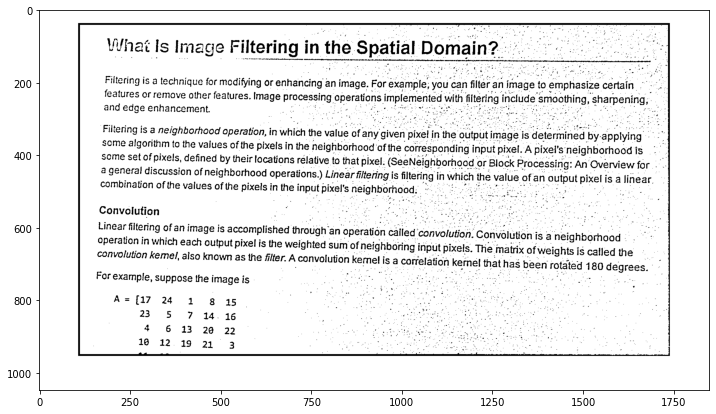

In [82]:
dst = cv2.adaptiveThreshold(text_img_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,4)
imshow(dst)

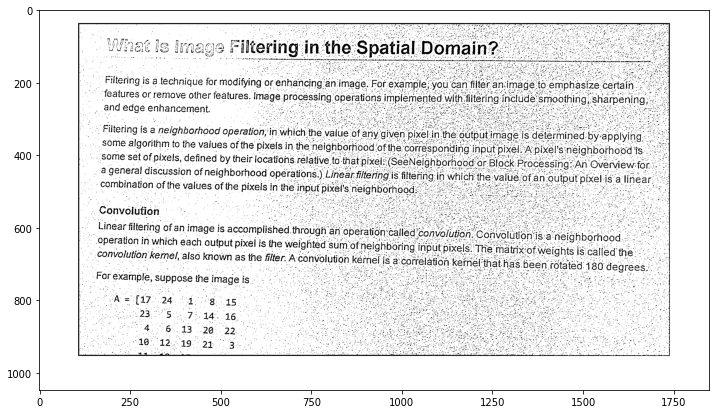

In [85]:
dst = cv2.adaptiveThreshold(text_img_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,7,2)
imshow(dst)

In [89]:
ret, binary = cv2.threshold(text_img_gray,20,255,cv2.THRESH_BINARY)
imshow(binary)

In [99]:
import numpy as np

In [109]:
kernel = np.ones((7,7),np.uint8)
kernel

array([[1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

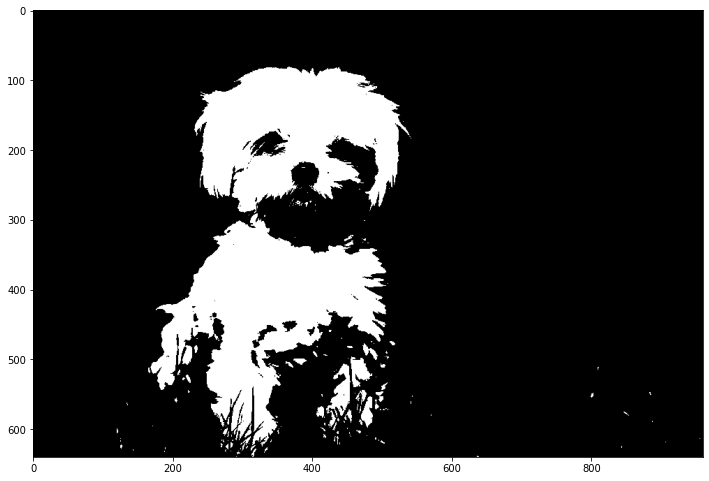

In [111]:
# Dilation
cross = cv2.getStructuringElement(cv2.MORPH_CROSS,(7,7))
ret, threshold = cv2.threshold(gray_dog,200,255,cv2.THRESH_BINARY)
imshow(threshold)

dilation = cv2.dilate(threshold,cross,iterations=5)
imshow(dilation)

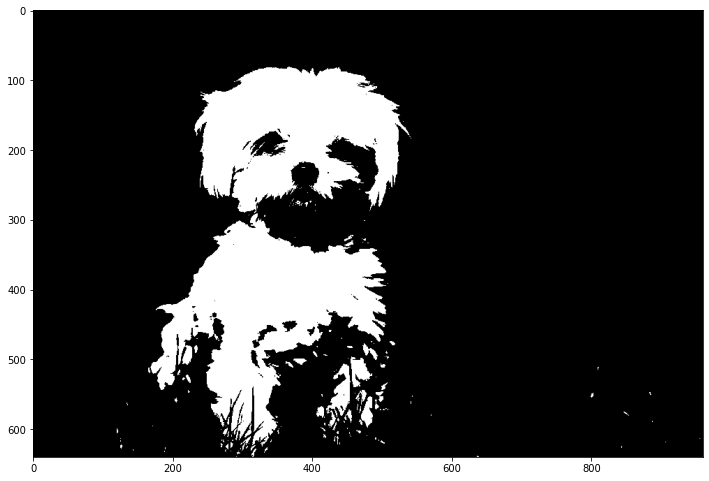

In [112]:
cross = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))

ret, threshold = cv2.threshold(gray_dog,200,255,cv2.THRESH_BINARY)
imshow(threshold)

dilation = cv2.dilate(threshold,cross,iterations=5)
imshow(dilation)

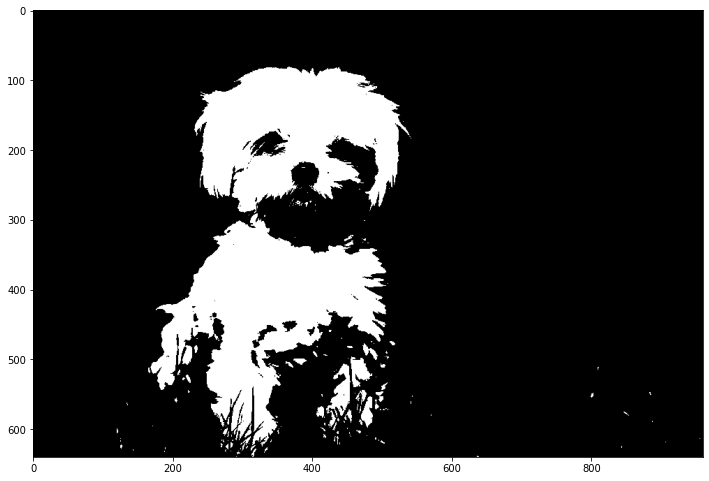

In [106]:
# Erosion
kernel = np.ones((3,3),np.uint8)

imshow(threshold)
erosion = cv2.erode(threshold,kernel,iterations=2)
imshow(erosion)

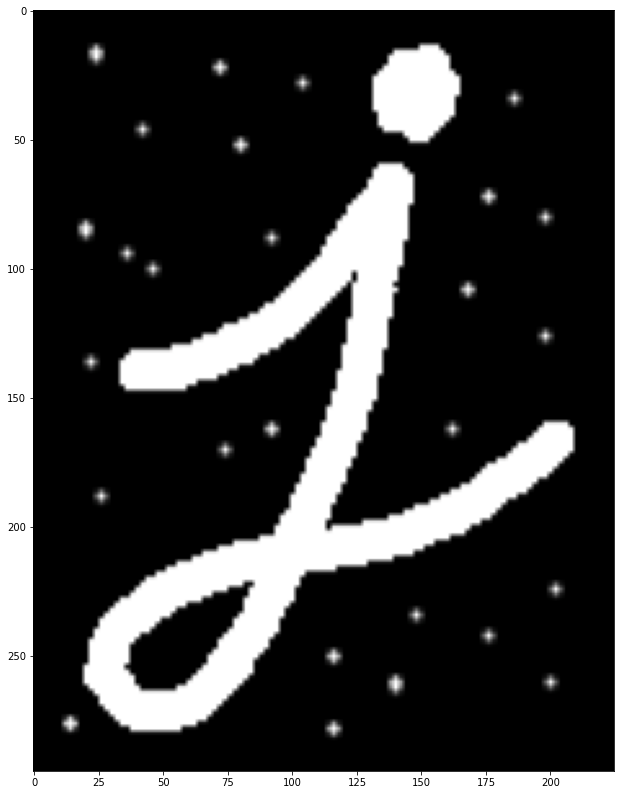

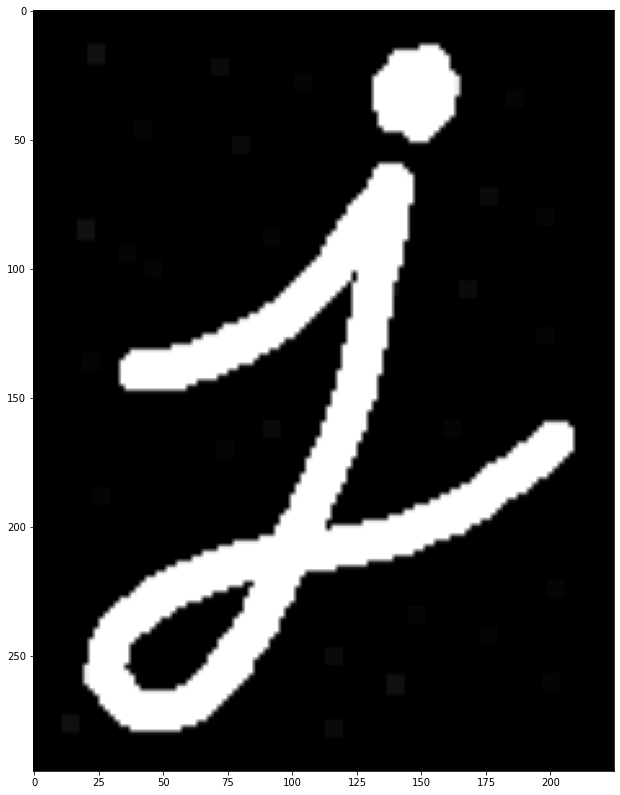

In [117]:
# Opening
j2 = cv2.imread('img/j2.png')

opening = cv2.morphologyEx(j2,cv2.MORPH_OPEN,kernel)
imshow(j2)
imshow(opening)

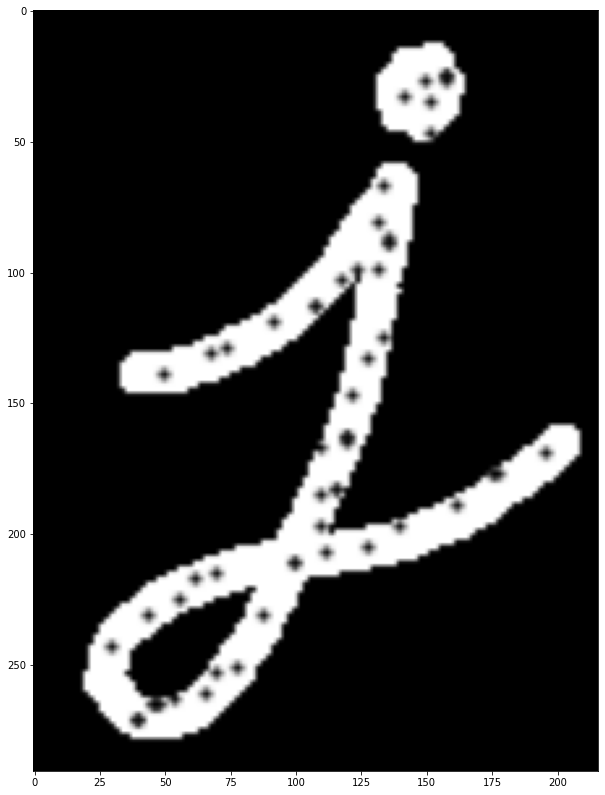

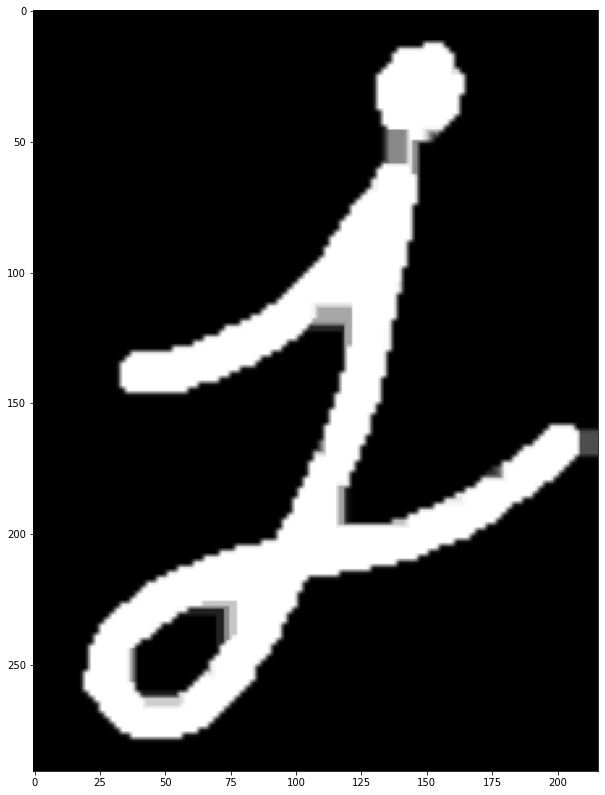

In [119]:
# Closing
j1 = cv2.imread('img/j1.png')

closing = cv2.morphologyEx(j1,cv2.MORPH_CLOSE,kernel, iterations=2)
imshow(j1)
imshow(closing)

### Kernels

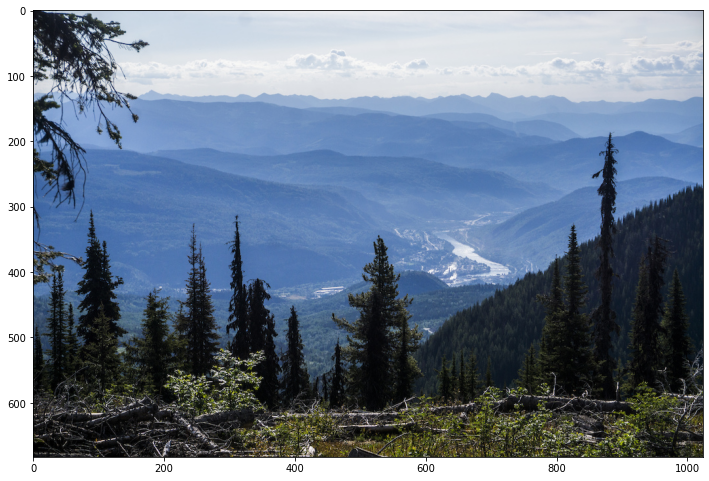

In [9]:
img = cv2.imread('./img/day2.jpg')
rgb_img = imshow(img)

In [13]:
# BLur Kernels Manual Application
import numpy as np
blur_kernel = np.ones((11,11),np.float32)/121
blur_img = cv2.filter2D(img,-1,blur_kernel)

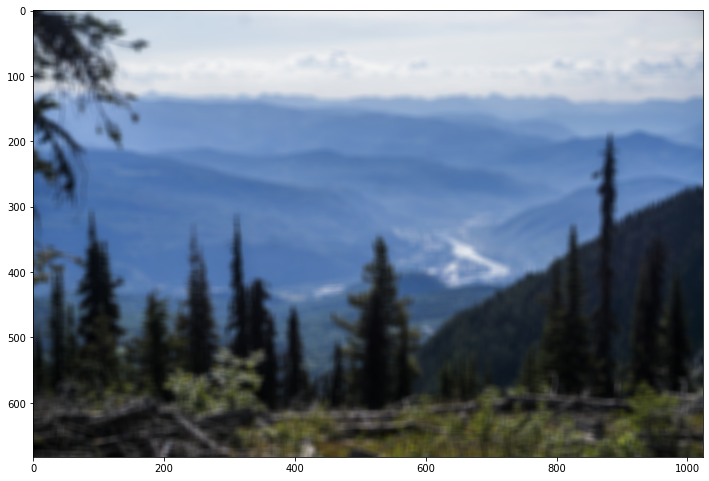

In [14]:
imshow(blur_img)

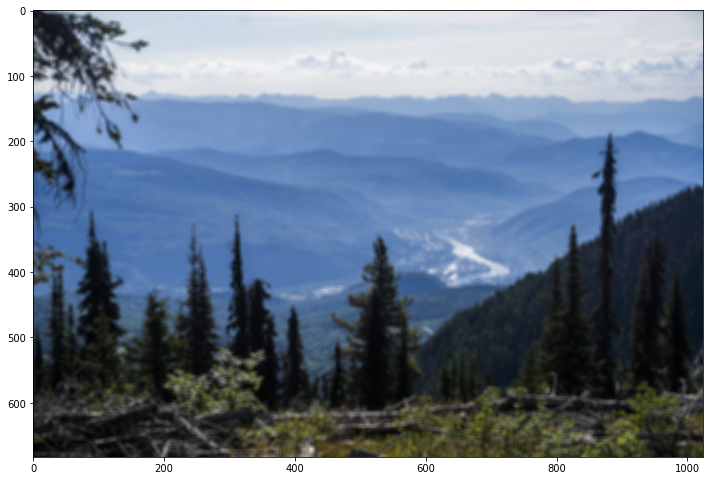

In [16]:
blur = cv2.blur(img,(7,7))
imshow(blur)

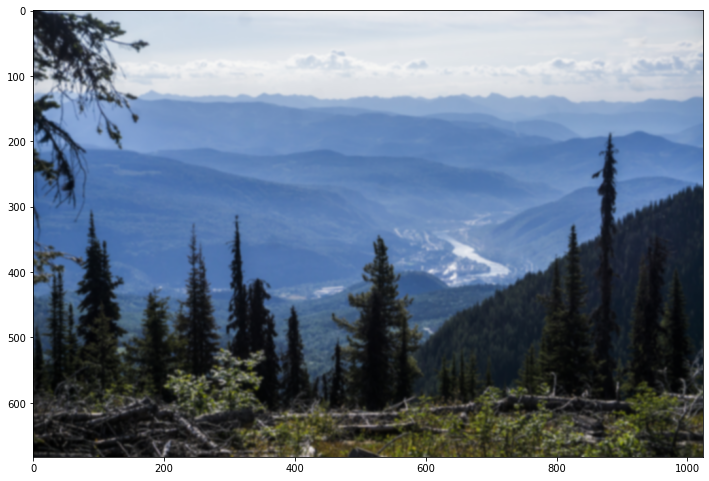

In [15]:
gaussian_blur = cv2.GaussianBlur(img,(7,7),0) # most used one
imshow(gaussian_blur)

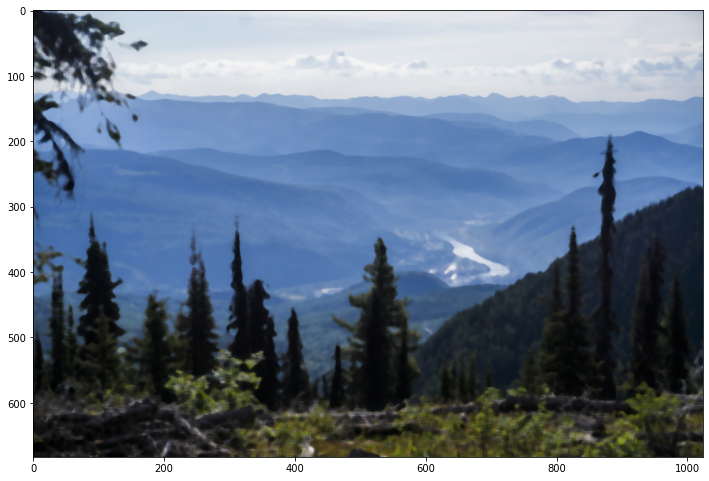

In [17]:
blur = cv2.medianBlur(img,7)
imshow(blur)

In [24]:
# Sharpening Kernel

sharpening_kernel = np.ones((3,3),np.float32)* -1
sharpening_kernel[1,1] = 9

sharpening_kernel

array([[-1., -1., -1.],
       [-1.,  9., -1.],
       [-1., -1., -1.]], dtype=float32)

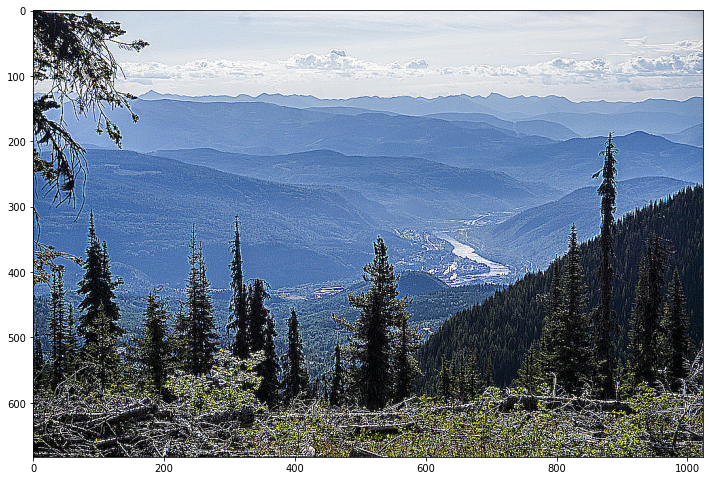

In [25]:
sharp_img = cv2.filter2D(img,-1,sharpening_kernel)
imshow(sharp_img)

In [26]:
# Edge Detection Kernel

edge_kernel = np.ones((3,3),np.float32)* -1
edge_kernel[1,1] = 8

edge_kernel

array([[-1., -1., -1.],
       [-1.,  8., -1.],
       [-1., -1., -1.]], dtype=float32)

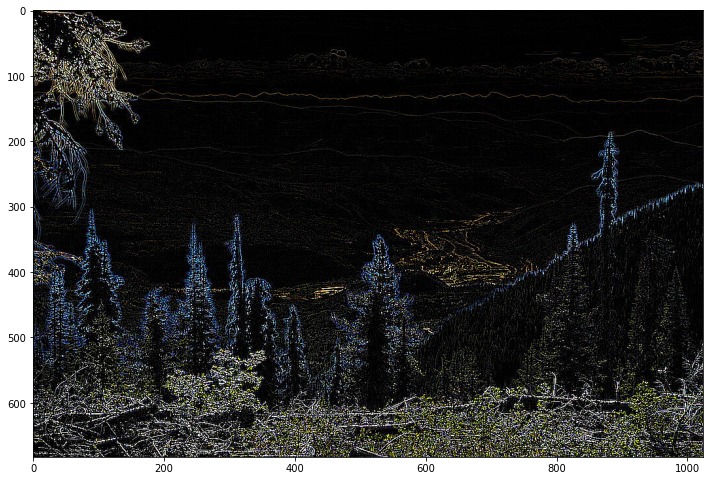

In [27]:
edge_img = cv2.filter2D(img,-1,edge_kernel)
imshow(edge_img)

In [ ]:
# Canny Edges
    # 1. Noise Reduction
    # 2. Calculating Intensity Gradient of the Image
    # 3. Suppression of False Edges
    # 4. Hysteresis Thresholding

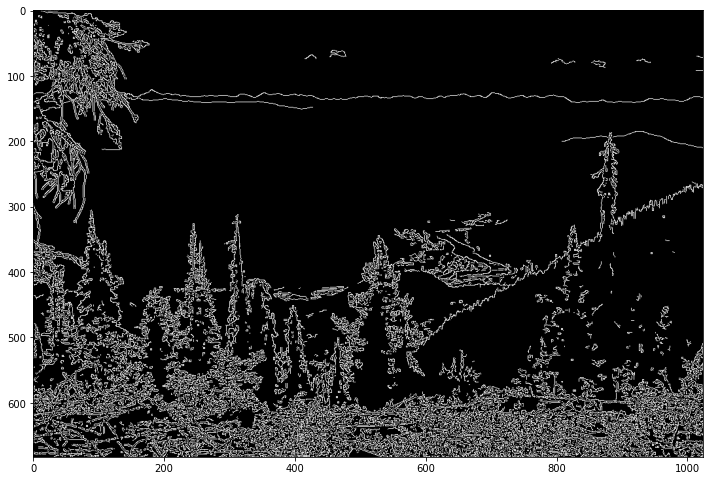

In [54]:
# Canny Edges
edges = cv2.Canny(img,100,200)  #The smallest value between threshold1 and threshold2 is used for edge linking. The largest value is used to find initial segments of strong edges.
imshow(edges)

In [ ]:
# cv2.Laplacian

# cv2.Sobel

In [ ]:
# cv2.Sobel

# Sobel(src, ddepth, dx, dy) #If dx=1 and dy=0, we compute the 1st derivative Sobel image in the x-direction. If both dx=1 and dy=1, we compute the 1st derivative Sobel image in both directions

In [60]:
sobel_op = cv2.Sobel(img, cv2.CV_64F, dx=1, dy=1, ksize=5)
imshow(sobel_op)

error: OpenCV(4.5.5) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0xa96199bf::Set<3,4,-1>,struct cv::impl::A0xa96199bf::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)
